# Progress Report: [Blog-Sentiment Analysis](https://github.com/Data-Science-for-Linguists-2019/Blog-Sentiment-Analysis)
## Table of Contents


In [2]:
# Import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re

In [3]:
dir = '/users/eva/Documents/Data_Science/Blog-Sentiment-Analysis/'

In [4]:
blogdata = pd.read_csv(dir + 'data/blogtext.csv')

In [5]:
blogdata.columns

Index(['id', 'gender', 'age', 'topic', 'sign', 'date', 'text'], dtype='object')

In [6]:
newcolumns = ['id', 'gender', 'age', 'industry', 'sign', 'date', 'text']
blogdata.columns = newcolumns
blogdata.head(3)

,id,gender,age,industry,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...


## Overview
Each line in `blogdata` is equal to one blog. 
+ `id` = number representing the individual blogger
+ `gender` = gender of the blogger
+ `age` = age of the blogger
+ `industry` = self-identified industry of the blogger
    + Note: Some bloggers are listed as IndUnk, meaning industry unknown
+ `sign` = astrolological sign of the blogger
+ `date` = date of that blog's posting
+ `text` = the text of the blog

In order to look at demographic statistics, I will create a new dataframe called `per_blogger` with only one blog per blogger.

In [8]:
len(blogdata)

681284

In [9]:
len(blogdata.id.value_counts())

19320

The dataset contains 681284 blogs written by 19320 bloggers.

In [10]:
per_blogger = blogdata.drop_duplicates("id")

In [11]:
len(per_blogger)

19320

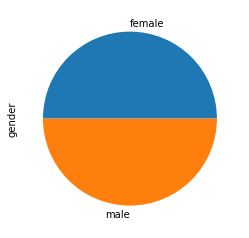

In [12]:
per_blogger.gender.value_counts().plot(kind="pie")

In [13]:
per_blogger.gender.value_counts(normalize=True)

female    0.5
male      0.5
Name: gender, dtype: float64

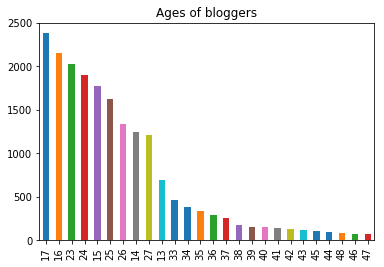

In [20]:
per_blogger.age.value_counts().plot(kind='bar',title='Ages of bloggers')

In [21]:
per_blogger.age.describe()

count    19320.000000
mean        22.833799
std          7.975490
min         13.000000
25%         16.000000
50%         23.000000
75%         26.000000
max         48.000000
Name: age, dtype: float64

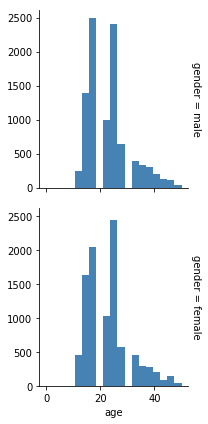

In [22]:
g = sns.FacetGrid(per_blogger, row="gender", margin_titles=True)
bins = np.linspace(0, 50, 20)
g.map(plt.hist, "age", color="steelblue", bins=bins)

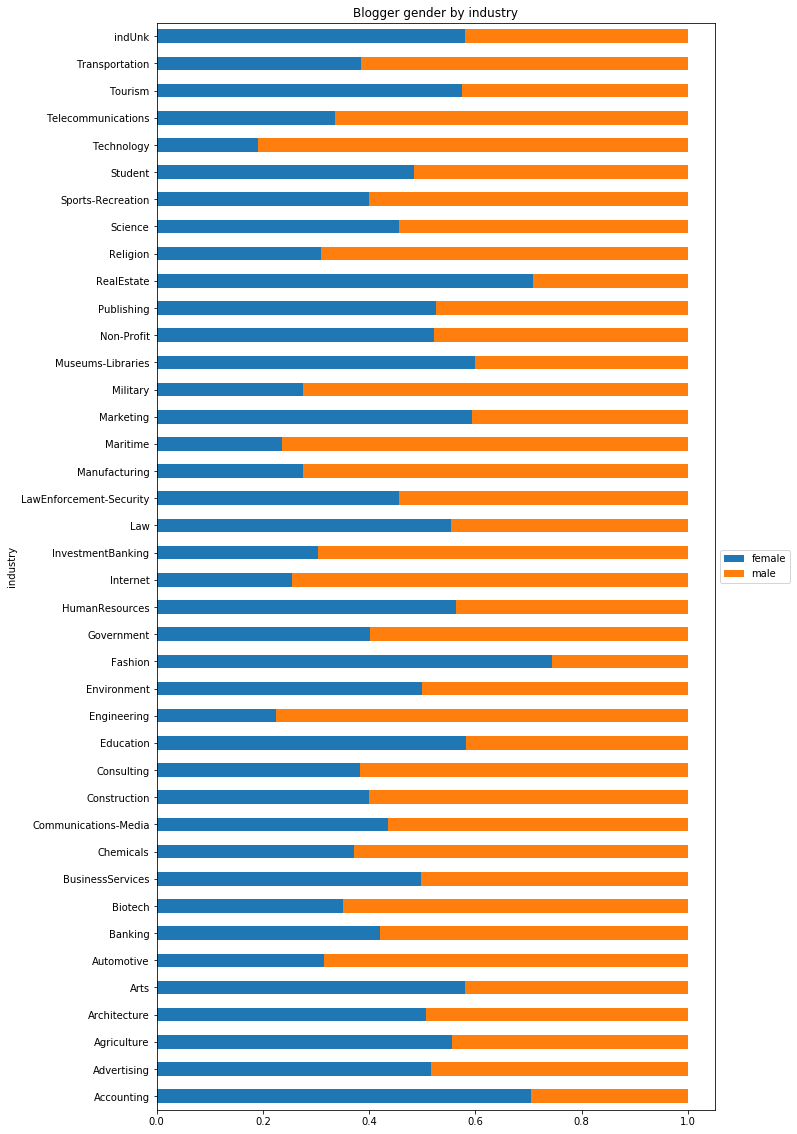

In [27]:
industry_by_gender = per_blogger.groupby('industry').gender.value_counts(normalize=True)
industry_by_gender.unstack(level=1).plot.barh(figsize=(10,20), stacked=True, title="Blogger gender by industry")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

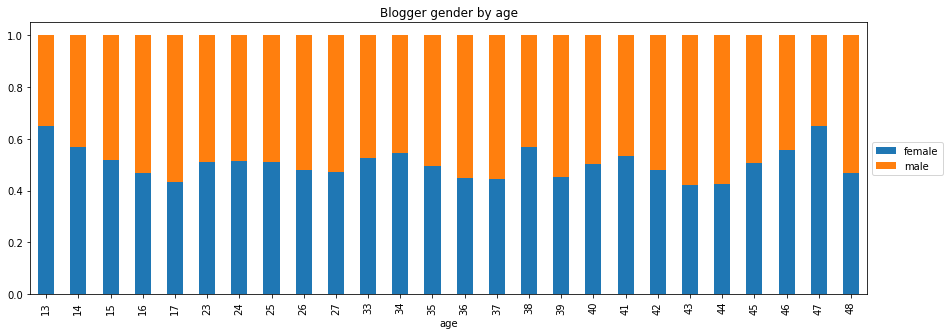

In [28]:
age_by_gender = per_blogger.groupby('age').gender.value_counts(normalize=True)
age_by_gender.unstack(level=1).plot.bar(figsize=(15,5), stacked=True, title="Blogger gender by age")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [29]:
print(plt.style.available)

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


# Data analysis
### Goals of my analysis
There are three things I would like to investigate in this data. 
1. Word frequencies
2. Blog topics
3. Blog sentiment

In this section, I will begin investigating all three, and hopefully get an idea of analyses to further explore.
## Data analysis: Word frequencies

### Methods
First, I'll tokenize all the blogs. Then I'll use NLTK to build some frequency distributions.

In [31]:
blogdata['tokens'] = blogdata.text.map(nltk.word_tokenize)

In [32]:
blogdata.head()

,id,gender,age,industry,sign,date,text,tokens
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,...","[Info, has, been, found, (, +/-, 100, pages, ,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...,"[These, are, the, team, members, :, Drewes, va..."
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...,"[In, het, kader, van, kernfusie, op, aarde, :,..."
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!,"[testing, !, !, !, testing, !, !, !]"
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...,"[Thanks, to, Yahoo, !, 's, Toolbar, I, can, no..."


In [41]:
example_fd = nltk.FreqDist(blogdata.tokens[0])

In [42]:
example_fd.most_common(10)

[('has', 2),
 ('and', 2),
 ('Info', 1),
 ('been', 1),
 ('found', 1),
 ('(', 1),
 ('+/-', 1),
 ('100', 1),
 ('pages', 1),
 (',', 1)]

Well, I wish I'd sorted out removing punctuation beforehand, but this is pretty good nonetheless. I tried making some conditional frequency distributions using industry, but it seems the code from the [NLTK book](http://www.nltk.org/book_1ed/ch02.html) doesn't work anymore. (Or maybe I'm just doing it wrong.) I'm going to try a different method to compare word frequencies across groups.

In [54]:
set(blogdata.industry.values)

{'Accounting',
 'Advertising',
 'Agriculture',
 'Architecture',
 'Arts',
 'Automotive',
 'Banking',
 'Biotech',
 'BusinessServices',
 'Chemicals',
 'Communications-Media',
 'Construction',
 'Consulting',
 'Education',
 'Engineering',
 'Environment',
 'Fashion',
 'Government',
 'HumanResources',
 'Internet',
 'InvestmentBanking',
 'Law',
 'LawEnforcement-Security',
 'Manufacturing',
 'Maritime',
 'Marketing',
 'Military',
 'Museums-Libraries',
 'Non-Profit',
 'Publishing',
 'RealEstate',
 'Religion',
 'Science',
 'Sports-Recreation',
 'Student',
 'Technology',
 'Telecommunications',
 'Tourism',
 'Transportation',
 'indUnk'}

In [71]:
minidf = blogdata.head(3)

In [72]:
minidf

,id,gender,age,industry,sign,date,text,tokens
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,...","[Info, has, been, found, (, +/-, 100, pages, ,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...,"[These, are, the, team, members, :, Drewes, va..."
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...,"[In, het, kader, van, kernfusie, op, aarde, :,..."


In [78]:
def Testing(df, column):
    for category in set(df[column].values):
        for blog in df[df[column]==category].tokens:
            print(blog)

In [79]:
Testing(minidf, 'industry')

['Info', 'has', 'been', 'found', '(', '+/-', '100', 'pages', ',', 'and', '4.5', 'MB', 'of', '.pdf', 'files', ')', 'Now', 'i', 'have', 'to', 'wait', 'untill', 'our', 'team', 'leader', 'has', 'processed', 'it', 'and', 'learns', 'html', '.']
['These', 'are', 'the', 'team', 'members', ':', 'Drewes', 'van', 'der', 'Laag', 'urlLink', 'mail', 'Ruiyu', 'Xie', 'urlLink', 'mail', 'Bryan', 'Aaldering', '(', 'me', ')', 'urlLink', 'mail']
['In', 'het', 'kader', 'van', 'kernfusie', 'op', 'aarde', ':', 'MAAK', 'JE', 'EIGEN', 'WATERSTOFBOM', 'How', 'to', 'build', 'an', 'H-Bomb', 'From', ':', 'ascott', '@', 'tartarus.uwa.edu.au', '(', 'Andrew', 'Scott', ')', 'Newsgroups', ':', 'rec.humor', 'Subject', ':', 'How', 'To', 'Build', 'An', 'H-Bomb', '(', 'humorous', '!', ')', 'Date', ':', '7', 'Feb', '1994', '07:41:14', 'GMT', 'Organization', ':', 'The', 'University', 'of', 'Western', 'Australia', 'Original', 'file', 'dated', '12th', 'November', '1990', '.', 'Seemed', 'to', 'be', 'a', 'transcript', 'of', 'a',

In [64]:
from collections import Counter

In [80]:
def Top10CategoryWords(df, column):
    # find top 10 words for each category in a column and plot
    ax_count = 0
    fig, axes = plt.subplots(len(set(df[column].values)), 1)
    for category in set(df[column].values):
        cnt = Counter()
        for blog in df[df[column]==category].tokens:
            for word in blog:
                cnt[word] += 1
        cnt.most_common(10).plot(kind='bar', x='10 most frequent words', y=category, ax=axes[ax_count])
        ax_count += 1

In [ ]:
cnt

AttributeError: 'list' object has no attribute 'plot'

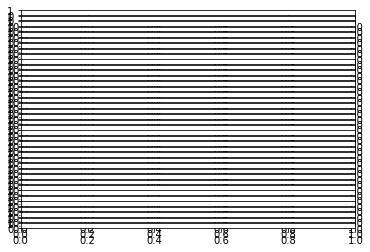

In [81]:
Top10CategoryWords(blogdata, 'industry')

## Data analysis: Topic clustering
I would like to look at what topics are discussed in different blogs, and whether those topics vary according to demographic group. I imagine the topics will be have clear differences when grouped by blogger industry, though even within industry blogs may vary widely - just because two people both work in "Banking" does not mean they both blog about banking.

I did not originally intend to look at blog topics, but I have been reading a lot about topic modelling and it is really interesting to me. I wanted to give it a try using this data.
### Methods
I have absolutely no interest in going through all or even a portion of the 681,000 blogs in this dataset and hand-labelling them for topics. So, supervised learning is not going to work here. I am going to try my hand at unsupervised learning. Specifically, I am going to try **Latent Dirichlet allocation (LDA)** using scikit-learn. LDA performs topic detection on large, unlabelled document sets. In order to use LDA, I need to convert the texts to vectors. 

I learned this model from the DataCamp project ["The Hottest Topics in Machine Learning"](https://projects.datacamp.com/projects/158). I edited the code in that tutorial to fit my own data.
### Preprocessing the data
First, I'm going to remove punctuation and lowercase all blog texts. Then, I will convert the blog texts into vectors.

In [6]:
print(blogdata['text'].head())

0               Info has been found (+/- 100 pages,...
1               These are the team members:   Drewe...
2               In het kader van kernfusie op aarde...
3                     testing!!!  testing!!!          
4                 Thanks to Yahoo!'s Toolbar I can ...
Name: text, dtype: object


In [7]:
from string import punctuation
print(punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [8]:
# Remove punctuation
blogdata['text_processed'] = blogdata['text'].map(lambda x: re.sub('[!"#$%&\'()*+,-./:;<=>?@[\]^_`{|}~]', '', x))

# Lowercase
blogdata['text_processed'] = blogdata['text_processed'].map(lambda x: x.lower())

# Remove extra white space. Not sure if it messes with the vectorization process in any way but just to be sure
blogdata['text_processed'] = blogdata['text_processed'].map(lambda x: ' '.join(x.split()))

print(blogdata['text_processed'].head())

0    info has been found 100 pages and 45 mb of pdf...
1    these are the team members drewes van der laag...
2    in het kader van kernfusie op aarde maak je ei...
3                                      testing testing
4    thanks to yahoos toolbar i can now capture the...
Name: text_processed, dtype: object


In [13]:
# I originally did this with CountVectorizer but it didn't load, leaving this code in just in case

# from sklearn.feature_extraction.text import CountVectorizer
# Create count vectorizer with English stop words
# count_vectorizer = CountVectorizer(max_features=500, stop_words = "english")
# blog_vec = count_vectorizer.fit_transform(blogdata['text_processed'])

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.5, min_df=2, max_features = 1500, stop_words='english') 

In [10]:
blog_tfidf = tfidf_vectorizer.fit_transform(blogdata['text_processed'])

In [11]:
from sklearn.decomposition import LatentDirichletAllocation as LDA

def print_topics(model, tfidf_vectorizer, n_top_words):
    words = tfidf_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))

# Picking number of topics and number of words
number_topics = 50
number_words = 5

lda = LDA(n_components=number_topics)
lda.fit(blog_tfidf)

Topics found via LDA:


NameError: name 'count_vectorizer' is not defined

In [12]:
print("Topics found via LDA:")
print_topics(lda, tfidf_vectorizer, number_words)

Topics found via LDA:

Topic #0:
na la ko sa da

Topic #1:
snow exam weather ben cold

Topic #2:
youre dont like im just

Topic #3:
urllink google search information art

Topic #4:
dont im just know want

Topic #5:
love life know heart just

Topic #6:
school class im teacher just

Topic #7:
book read books reading im

Topic #8:
pm break spring im ah

Topic #9:
site urllink page web website

Topic #10:
wedding beach im apartment lake

Topic #11:
baby women dave child woman

Topic #12:
god jesus lord life christ

Topic #13:
birthday happy party day im

Topic #14:
dun den juz wat tt

Topic #15:
movie movies film watch urllink

Topic #16:
test don questions ve question

Topic #17:
car road bike just driving

Topic #18:
hair black color red like

Topic #19:
hello dance kiss fly say

Topic #20:
im boring nick going really

Topic #21:
dad mom im paul just

Topic #22:
bush urllink kerry war president

Topic #23:
dog photos dogs concert tickets

Topic #24:
lol im like ur gonna

Topic #25:
bye w

Some topics and my thoughts:

+ **Topic #11: baby women dave child woman**
  + What. What is this.
+ **Topic #12: god jesus lord life christ**
  + Found the Christian bloggers.
+ **Topic #14: dun den juz wat tt**
  + I *think* this might actually be early 2000s textspeak, and I am super excited the model clustered these together.
+ **Topic #17: car road bike just driving**
  + ... transportation bloggers?
+ **Topic #20: im boring nick going really** & also **Topic #21: dad mom im paul just**
  + Here's what confuses me: Some of these have NAMES in them. How is that possible? How can the model cluster 682k blogs and have top words include people's names? Maybe I should find some way to exclude names from the data, because they might be clustering blogs that otherwise have nothing to do with each other.
+ **Topic #22: bush urllink kerry war president**
  + Found the political bloggers.
+ **Topic #23: dog photos dogs concert tickets**
  + These bloggers live a simple life: they love dogs and concerts. I respect that.
+ **Topic #24: lol im like ur gonna**
  + More! teen! bloggers! (I think.)
+ **Topic #27: fucking fuck shit im like**
  + People who curse a lot!
+ **Topic #30: eyes like just sun sky**
  + Poets?
+ **Topic #38: ha haha hi im oh**
  + More teens? Adults who use haha too much? 
+ **Topic #39: cheese 12 chocolate cream like**
  + Found the food bloggers.
+ **Topic #47: sleep im bed tired night**
  + Me currently. Also probably me in 2004.
  
#### Things I should change

I'm going to hold on off on changing the model / preprocessed text, since that took around 35 minutes to load and made my computer approximately twice as hot as the sun. But when I re-do this, I will: remove urllink, since it is not useful; use a better tokenizer, there are way too many tokens of "im"; figure out if I can remove non-English text without completely removing multilingual blogs. One cluster seems to be entirely non-English blogs: **Topic #0:
na la ko sa da***.